# Problem Statement :

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 

We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber.

They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. The sample data is provided to us from our client database.
In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 

# Aim :

__Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan.__ 

In [1]:
# Importing the first required libraries

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

And rest of the libraries will be imported according to our requirements as we proceed further into the project

In [2]:
# To display all columns

pd.set_option('display.max_columns',None)

In [3]:
# Getting the dataset

df=pd.read_csv('Micro Data.csv')

In [4]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [5]:
# First let's remove the unnamed column which is just an extra index

df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
df.head(1)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.5,2,21,3078,1539.0,7.5,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.0,29.0,UPW,2016-07-20


_Successfully removed._

Now let's understand the various features of this dataset :

__label__ : Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan {1:success, 0:failure}

__msisdn__ : mobile number of user

__aon__ : age on cellular network in days

__daily_decr30__ : Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

__daily_decr90__ : Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

__rental30__ : Average main account balance over last 30 days

__rental90__ : Average main account balance over last 90 days

__last_rech_date_ma__ : Number of days till last recharge of main account

__last_rech_date_da__ : Number of days till last recharge of data account

__last_rech_amt_ma__ : Amount of last recharge of main account (in Indonesian Rupiah)

__cnt_ma_rech30__ : Number of times main account got recharged in last 30 days

__fr_ma_rech30__ : Frequency of main account recharged in last 30 days

__sumamnt_ma_rech30__ : Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)

__medianamnt_ma_rech30__ : Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)

__medianmarechprebal30__ : Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)

__cnt_ma_rech90__ : Number of times main account got recharged in last 90 days

__fr_ma_rech90__ : Frequency of main account recharged in last 90 days

__sumamnt_ma_rech90__ : Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)

__medianamnt_ma_rech90__ : Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)

__medianmarechprebal90__ : Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)

__cnt_da_rech30__ : Number of times data account got recharged in last 30 days

__fr_da_rech30__ : Frequency of data account recharged in last 30 days

__cnt_da_rech90__ : Number of times data account got recharged in last 90 days

__fr_da_rech90__ : Frequency of data account recharged in last 90 days

__cnt_loans30__ : Number of loans taken by user in last 30 days

__amnt_loans30__ : Total amount of loans taken by user in last 30 days

__maxamnt_loans30__ : maximum amount of loan taken by the user in last 30 days

__medianamnt_loans30__ : Median of amounts of loan taken by the user in last 30 days

__cnt_loans90__ : Number of loans taken by user in last 90 days

__amnt_loans90__ : Total amount of loans taken by user in last 90 days

__maxamnt_loans90__ : maximum amount of loan taken by the user in last 90 days

__medianamnt_loans90__ : Median of amounts of loan taken by the user in last 90 days

__payback30__ : Average payback time in days over last 30 days

__payback90__ : Average payback time in days over last 90 days

__pcircle__ : telecom circle

__pdate__ : date

# Exploratory Data Analysis :

In [7]:
# Checking shape of the dataset

df.shape

(209593, 36)

There are 209593 rows and 36 columns in the above dataset.

In [8]:
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [9]:
# Checking datatype of the dataset

df.dtypes

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

Most of the features are float datatype and some are object and int datatype.

In [10]:
# Getting more information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

There are no null values in our dataset.

Memory used by the dataset is 57.6+ MB.

In [11]:
#Checking for unique values in each feature

df.nunique()

label                        2
msisdn                  186243
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback3

In [12]:
df.pcircle

0         UPW
1         UPW
2         UPW
3         UPW
4         UPW
         ... 
209588    UPW
209589    UPW
209590    UPW
209591    UPW
209592    UPW
Name: pcircle, Length: 209593, dtype: object

As we can see here, pcircle has only one unique value for the whole dataset, hence we can drop it.

In [13]:
df.drop(['pcircle'],axis=1,inplace=True)

In [14]:
# Checking for null values

df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pdate                   0
dtype: int64

There are no null values.

We can also visualize and check :

In [15]:
# First importing the seaborn library

import seaborn as sns

<AxesSubplot:>

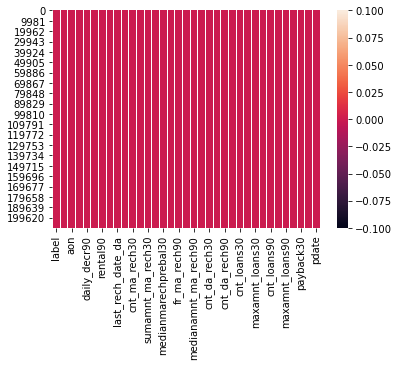

In [16]:
sns.heatmap(df.isnull())

# Exploring output variable :

In [17]:
df.label.unique()

array([0, 1], dtype=int64)

In [18]:
df.label.value_counts()

1    183431
0     26162
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

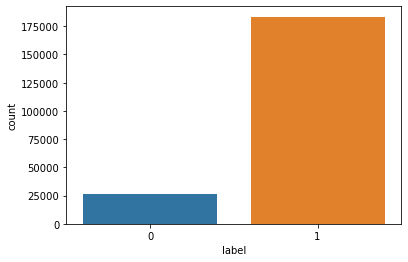

In [19]:
sns.countplot(x='label', data=df)

__<font color=orange>Here we can observe highly imbalanced data in our target. This will be balanced using  SMOTE technique in the later part of the project.</font>__

In [20]:
import matplotlib.pyplot as plt

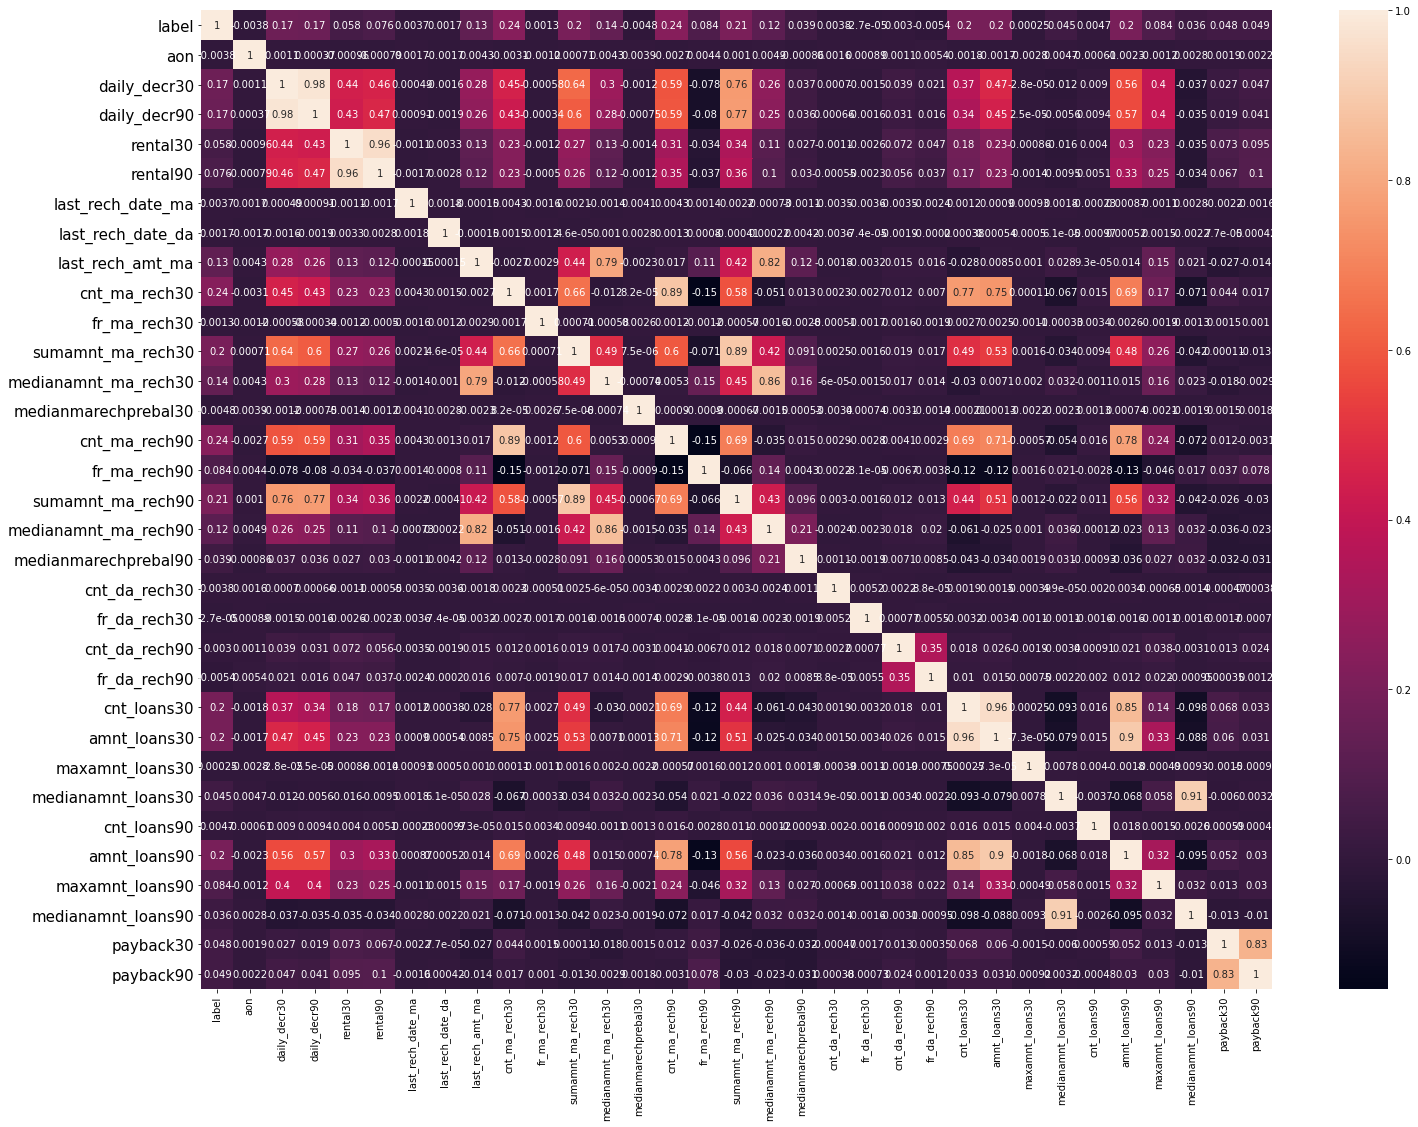

In [21]:
corr=df.corr()
plt.figure(figsize=(24,18))
sns.heatmap(corr, annot=True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=15)
plt.show()

Here we can see that "aon" does not have a good correlation with the target hence we can drop it.

In [22]:
df.drop(['aon'],axis=1,inplace=True)

In [23]:
df['pdate'].str.replace("-","").astype(int)

0         20160720
1         20160810
2         20160819
3         20160606
4         20160622
            ...   
209588    20160617
209589    20160612
209590    20160729
209591    20160725
209592    20160707
Name: pdate, Length: 209593, dtype: int32

# Univariate Analysis :

<AxesSubplot:xlabel='daily_decr30', ylabel='Density'>

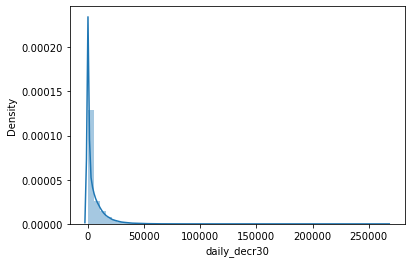

In [24]:
 sns.distplot(df['daily_decr30'])

Daily amount spent from main account, averaged over last 30 days, is less than 50000 and the data is mostly skewed and it is right skewed.

<AxesSubplot:xlabel='daily_decr90', ylabel='Density'>

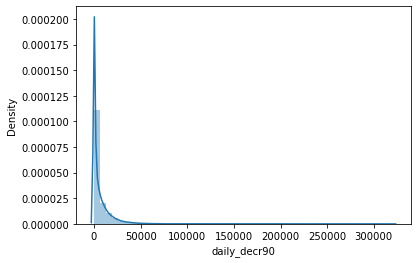

In [25]:
sns.distplot(df['daily_decr90'])

Daily amount spent from main account, averaged over last 90 days, is less than 50000 and the data is mostly skewed and it is right skewed.

<AxesSubplot:xlabel='rental30', ylabel='Density'>

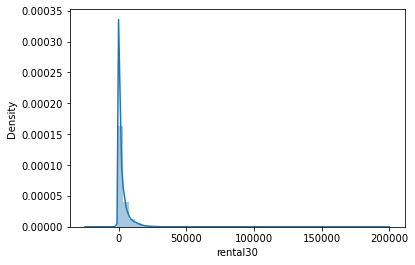

In [26]:
sns.distplot(df['rental30'])

Average main account balance over last 30 days, is less than 50000 and the data is mostly skewed and it is right skewed.

<AxesSubplot:xlabel='rental90', ylabel='Density'>

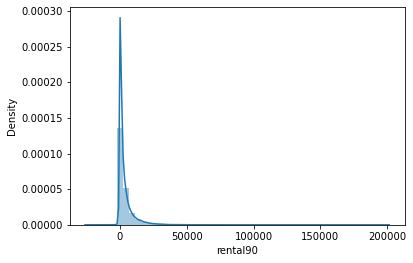

In [27]:
sns.distplot(df['rental90'])

Average main account balance over last 90 days, is less than 50000 and the data is mostly skewed and it is right skewed.

<AxesSubplot:xlabel='medianamnt_loans30', ylabel='count'>

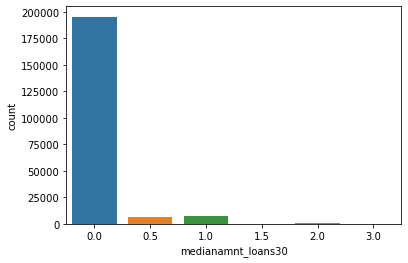

In [28]:
sns.countplot(x="medianamnt_loans30",data=df)

<AxesSubplot:xlabel='maxamnt_loans90', ylabel='count'>

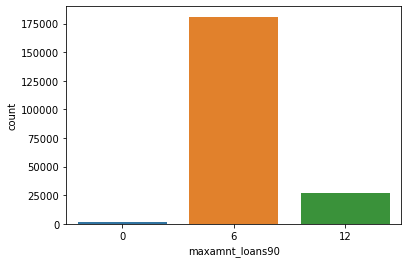

In [29]:
sns.countplot(x="maxamnt_loans90",data=df)

<AxesSubplot:xlabel='medianamnt_loans90', ylabel='count'>

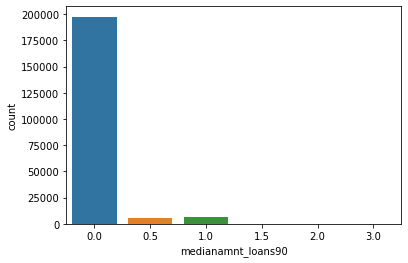

In [30]:
sns.countplot(x="medianamnt_loans90",data=df)

In [31]:
# Checking various factors of the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377733
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809410
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000
cnt_ma_rech30,209593.0,3.978057,4.256090,0.000000,1.000,3.000000,5.00,203.000000
fr_ma_rech30,209593.0,3737.355121,53643.625172,0.000000,0.000,2.000000,6.00,999606.368132


__Observations__:
    
    1. Most of the features has skewness, due the difference between mean median of that features.
    2. Much outliers are present due to huge differences between the 75th percentile and the max value.

In [32]:
# Checking Skewness of the dataset

df.skew()

label                   -2.270254
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans90          1.678304
medianamnt_loa

_The data is fairly symmetrical if the skewness is between +/-0.5._

_If the skewness is between -1 and – 0.5 or between 0.5 and 1, then there is a little decent skewness._

_If the skewness is less than -1 or greater than 1, the data are highly skewed._

__Observation :__

1. Some of the features are highly skewed.

In [33]:
# Taking days and month from pdate because years are same in all data is 2016

df['pmonth']=pd.to_datetime(df['pdate'],format="%Y-%m-%d").dt.month
df['pday']=pd.to_datetime(df['pdate'],format="%Y-%m-%d").dt.day
df.drop('pdate',axis=1,inplace=True)

# Detecting Outliers :

label                      AxesSubplot(0.125,0.787927;0.133621x0.0920732)
daily_decr30            AxesSubplot(0.285345,0.787927;0.133621x0.0920732)
daily_decr90             AxesSubplot(0.44569,0.787927;0.133621x0.0920732)
rental30                AxesSubplot(0.606034,0.787927;0.133621x0.0920732)
rental90                AxesSubplot(0.766379,0.787927;0.133621x0.0920732)
last_rech_date_ma          AxesSubplot(0.125,0.677439;0.133621x0.0920732)
last_rech_date_da       AxesSubplot(0.285345,0.677439;0.133621x0.0920732)
last_rech_amt_ma         AxesSubplot(0.44569,0.677439;0.133621x0.0920732)
cnt_ma_rech30           AxesSubplot(0.606034,0.677439;0.133621x0.0920732)
fr_ma_rech30            AxesSubplot(0.766379,0.677439;0.133621x0.0920732)
sumamnt_ma_rech30          AxesSubplot(0.125,0.566951;0.133621x0.0920732)
medianamnt_ma_rech30    AxesSubplot(0.285345,0.566951;0.133621x0.0920732)
medianmarechprebal30     AxesSubplot(0.44569,0.566951;0.133621x0.0920732)
cnt_ma_rech90           AxesSubplot(0.

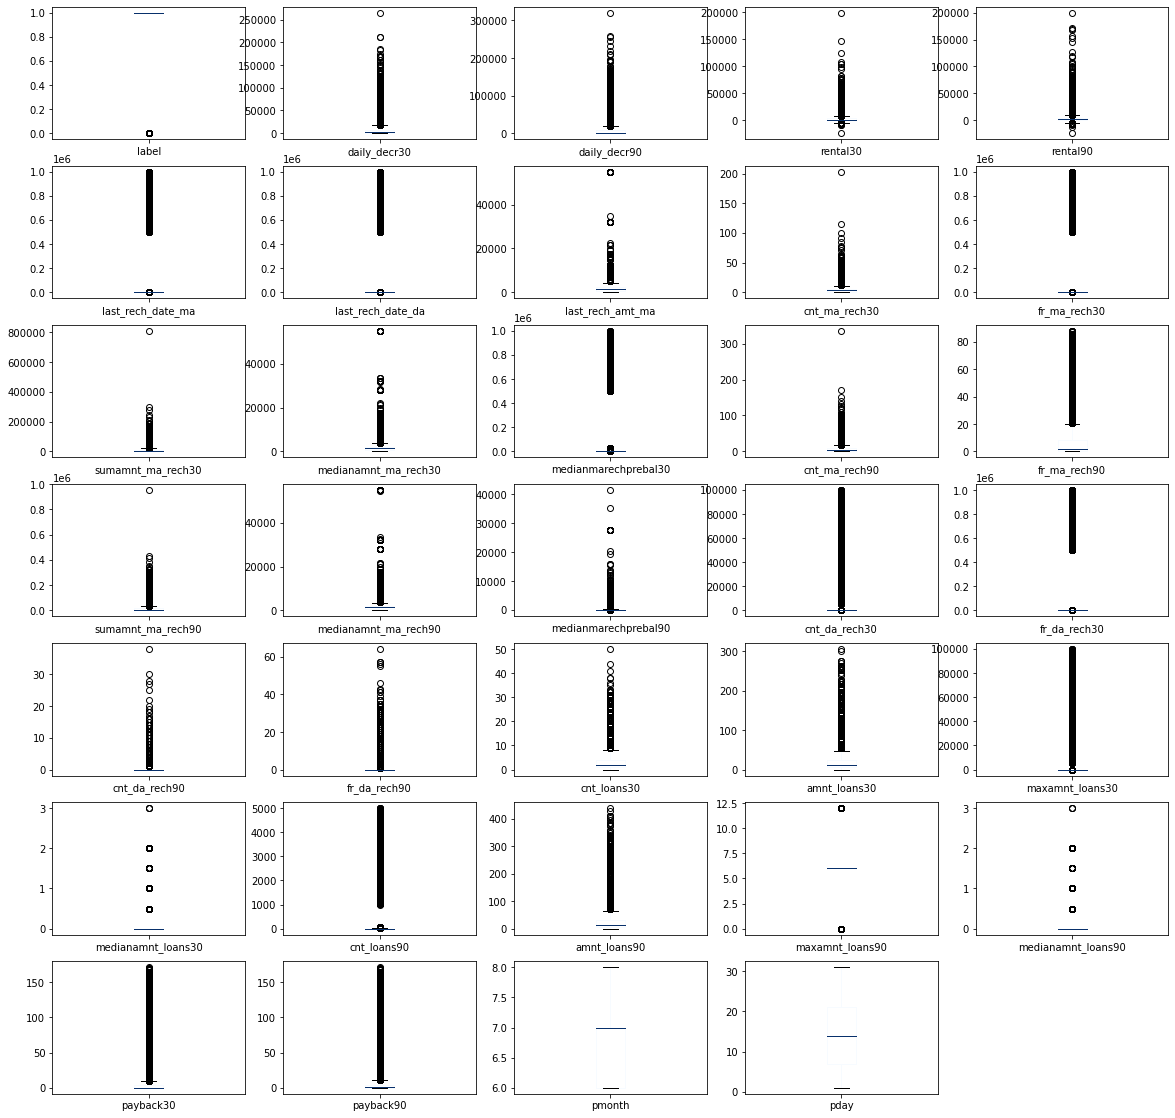

In [34]:
df.plot(kind='box', subplots=True, layout=(7,5), figsize=(20,20), colormap='Blues')

There are lots of outliers as we can observe.

In [35]:
# Importing required zscore library

from scipy.stats import zscore

In [36]:
import numpy as np

In [37]:
feature=df[['daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90', 'pmonth', 'pday']]

In [38]:
z=np.abs(zscore(feature))

In [39]:
df_new=df[(z<3).all(axis=1)] 

In [40]:
print('Shape of original dataframe', df.shape)

Shape of original dataframe (209593, 35)


In [41]:
print('Shape of dataframe after outliers removal', df_new.shape)

Shape of dataframe after outliers removal (172940, 35)


In [42]:
# Data loss percentage

loss=((209593-172940)/209593)*100
print('Data loss percentage ',loss)

Data loss percentage  17.48770235647183


In [43]:
#Removing outliers using percentile method 
for col in feature:
    if df[col].dtypes != 'object':
        percentile = df[col].quantile([0.01,0.98]).values
        df[col][df[col]<=percentile[0]]=percentile[0]
        df[col][df[col]>=percentile[1]]=percentile[1]

In [49]:
# Data part

x=df.drop(['label'],axis=1)
x.head(1)

,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pmonth,pday
0,3055.05,3065.15,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.5,2,21,3078.0,1539.0,7.5,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,24.0,29.0,7,20


In [45]:
# Target

y=df.label
y.head()

0    0
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [46]:
df.drop(['msisdn'],axis=1,inplace=True)

# SMOTE :
To balance the categorical imbalance in target.

In [47]:
from imblearn.over_sampling import SMOTE

In [50]:
sm = SMOTE()
x, y = sm.fit_resample(x,y)

In [51]:
y.value_counts()

0    183431
1    183431
Name: label, dtype: int64

Hence the target is balanced, and now we can proceed with machine learning models

# Feature Scaling :
To transform the dataset into same format, so that we have a uniform dataset.

In [52]:
# Importing required scaler library

from sklearn.preprocessing import StandardScaler

In [53]:
scale=StandardScaler()
x=pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x.head(10)

,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pmonth,pday
0,-0.060823,-0.101338,-0.606929,-0.587701,-0.496237,-0.069419,-0.067458,-0.224402,3.637303,-0.292666,0.059891,-0.466887,-0.412358,1.345117,-0.429858,0.005238,-0.518059,-0.0613,-0.069393,-0.087042,-0.054473,-0.046582,-0.134822,-0.278024,-0.231323,-0.256501,-0.270692,-0.315670,-0.219344,4.693785,4.231329,0.518881,0.746519
1,1.366655,1.134392,0.406574,0.189679,1.356197,-0.069419,2.028212,-0.527981,-0.618608,0.090396,2.516317,-0.022775,-0.597350,-0.560482,-0.197692,2.432680,0.019614,-0.0613,-0.069393,-0.087042,-0.054473,-0.572681,-0.134822,3.057730,-0.231323,-0.577479,-0.270692,3.314123,-0.219344,-0.500088,-0.506584,2.012117,-0.529986
2,-0.321705,-0.328738,-0.408382,-0.442699,-0.393324,-0.069419,-0.067458,-0.527981,-0.618608,-0.510286,0.059891,0.021022,-0.597350,-0.560482,-0.561752,0.005238,0.072638,-0.0613,-0.069393,-0.087042,-0.054473,-0.572681,-0.597266,-0.278024,-0.231323,-0.577479,-0.586267,-0.315670,-0.219344,-0.500088,-0.506584,2.012117,0.618869
3,-0.538461,-0.516530,-0.624655,-0.610519,3.517369,-0.069419,-0.359510,-0.831559,-0.618608,-0.727906,-0.830043,-0.529099,-0.597350,-0.560482,-0.612488,-0.333049,-0.568272,-0.0613,-0.069393,-0.087042,-0.054473,-0.046582,-0.134822,-0.278024,-0.231323,-0.256501,-0.270692,-0.315670,-0.219344,-0.500088,-0.506584,-0.974355,-1.040588
4,-0.518090,-0.498881,-0.350345,-0.397664,-0.290411,-0.069419,0.312407,1.293489,-0.213283,2.104262,0.505147,-0.288546,0.697593,-0.378997,1.319997,0.776100,-0.241892,-0.0613,-0.069393,-0.087042,-0.054473,2.583913,2.177399,-0.278024,-0.231323,1.348387,1.307182,-0.315670,-0.219344,0.004872,-0.125373,-0.974355,1.001820
5,-0.186409,-0.210962,-0.563716,-0.560513,-0.496237,-0.069419,-0.067458,0.382754,1.408016,0.142573,0.059891,-0.401357,0.697593,-0.560482,0.312832,0.005238,-0.032005,-0.0613,-0.069393,-0.087042,-0.054473,0.479517,0.327622,-0.278024,-0.231323,0.064477,0.044883,-0.315670,-0.219344,1.880437,0.854885,0.518881,-1.551190
6,-0.088911,-0.126051,-0.573170,-0.555354,0.635806,-0.069419,2.028212,-0.527981,-0.618608,0.090396,2.516317,1.775239,-0.597350,-0.560482,-0.197692,2.432680,2.196416,-0.0613,-0.069393,-0.087042,-0.054473,-0.572681,-0.597266,-0.278024,-0.231323,-0.577479,-0.586267,-0.315670,-0.219344,-0.500088,-0.506584,0.518881,-1.168239
7,1.489929,1.909063,-0.408318,-0.069094,-0.290411,-0.068393,0.741111,0.079176,-0.010621,0.743255,1.007650,-0.230481,0.882584,-0.288254,1.542735,0.941815,-0.231849,-0.0613,-0.069393,2.565371,-0.054473,0.479517,0.327622,-0.278024,-0.231323,1.348387,1.307182,-0.315670,-0.219344,0.798380,0.123582,2.012117,-1.168239
8,-0.527524,-0.507054,-0.003297,-0.128366,-0.599150,-0.069419,-0.067458,0.382754,-0.415946,0.143705,0.059891,-0.198131,-0.042375,-0.469739,-0.165383,0.005238,-0.192684,-0.0613,-0.069393,-0.087042,-0.054473,1.005616,0.790066,-0.278024,-0.231323,0.385454,0.360458,-0.315670,-0.219344,0.077009,-0.070914,-0.974355,0.108266
9,-0.537181,-0.515421,-0.492230,-0.507762,0.429980,-0.069419,-0.445350,-0.527981,-0.618608,-0.618601,-0.383052,0.190903,-0.597350,-0.560482,-0.627400,-0.432478,0.278307,-0.0613,-0.069393,-0.087042,-0.054473,-0.572681,-0.597266,-0.278024,-0.231323,-0.577479,-0.586267,-0.315670,-0.219344,-0.500088,-0.506584,-0.974355,-0.785287


# Power Transformation :
I will use Yeo-Johnson to transform this dataset so that the resulting features looks more normally distributed. And also reduce skewness and outliers.

In [54]:
# First importing the required library for power transformation

from sklearn.preprocessing import PowerTransformer

In [55]:
power=PowerTransformer(method='yeo-johnson')
x=pd.DataFrame(power.fit_transform(x), columns=x.columns)
x.head()

,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pmonth,pday
0,0.726532,0.671635,-0.877191,-0.865938,-0.492584,-0.082757,0.386528,0.131061,1.861690,0.040935,0.518537,-0.754375,-0.224822,1.667399,-0.302241,0.444593,-0.841472,-0.075013,-0.071058,-0.13693,-0.075567,0.580511,0.402544,-0.186141,-0.268188,0.193869,0.157335,-0.325966,-0.254901,1.934192,1.943677,0.648898,0.768919
1,1.689222,1.676220,1.105210,0.934523,1.552569,-0.082757,1.732684,-0.469718,-0.848347,0.678784,1.870671,0.749713,-0.702100,-0.859828,0.262486,1.848156,0.737379,-0.075013,-0.071058,-0.13693,-0.075567,-0.726802,0.402544,2.438275,-0.268188,-0.894468,0.157335,3.074177,-0.254901,-0.729714,-0.780725,1.733460,-0.497728
2,0.035259,-0.007680,-0.222625,-0.350612,-0.192641,-0.082757,0.386528,-0.469718,-0.848347,-0.491605,0.518537,0.835488,-0.702100,-0.859828,-0.705898,0.444593,0.823894,-0.075013,-0.071058,-0.13693,-0.075567,-0.726802,-0.818074,-0.186141,-0.268188,-0.894468,-0.902439,-0.325966,-0.254901,-0.729714,-0.780725,1.733460,0.650002
3,-0.857489,-0.846872,-0.943770,-0.956108,1.930785,-0.082757,-0.163577,-1.252669,-0.848347,-1.163901,-1.362180,-1.078836,-0.702100,-0.859828,-0.878380,-0.120062,-1.068529,-0.075013,-0.071058,-0.13693,-0.075567,0.580511,0.402544,-0.186141,-0.268188,0.193869,0.157335,-0.325966,-0.254901,-0.729714,-0.780725,-1.029144,-1.053863
4,-0.759196,-0.755563,-0.061217,-0.209938,0.069764,-0.082757,0.851544,1.404360,0.323360,1.714553,0.966526,0.006258,1.169055,-0.113074,1.533867,1.159493,0.146658,-0.075013,-0.071058,-0.13693,-0.075567,1.804670,1.746071,-0.186141,-0.268188,1.615162,1.593416,-0.325966,-0.254901,0.868834,0.568525,-1.029144,1.003149


# Machine Learning Models :
Here we have a classification case, hence we'll go with Logistic Regression and various other classification models.

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score 

# Finding best random state :

In [57]:
lr=LogisticRegression()

In [58]:
for i in range (0,300):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
# predicting the x_train so that we can cross check how well the model is performing    
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test, pred_test)*100,1):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training accuracy_score is:-", accuracy_score(y_train, pred_train)*100)
        print("Testing accuracy_score is:-", accuracy_score(y_test, pred_test)*100, '\n\n')

At random state 2  The model performs very well
At random_state:- 2
Training accuracy_score is:- 82.35947514216888
Testing accuracy_score is:- 82.42677824267783 


At random state 6  The model performs very well
At random_state:- 6
Training accuracy_score is:- 82.55300880101129
Testing accuracy_score is:- 82.59577773840515 


At random state 19  The model performs very well
At random_state:- 19
Training accuracy_score is:- 82.3744671861637
Testing accuracy_score is:- 82.42950404099601 


At random state 26  The model performs very well
At random_state:- 26
Training accuracy_score is:- 82.52745418056554
Testing accuracy_score is:- 82.50582639390511 


At random state 28  The model performs very well
At random_state:- 28
Training accuracy_score is:- 82.31960993427352
Testing accuracy_score is:- 82.28231093181415 


At random state 36  The model performs very well
At random_state:- 36
Training accuracy_score is:- 82.41773967678516
Testing accuracy_score is:- 82.354544587246 


At random s

So, we have found some of the good random state values with the help of Logistic Regression, and will select the one which gives highest accuracy.

14 random state with accuracy score 82

# Required Evaluation Metrices :

In [59]:
# Spliting the dataset

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=14)
# Here 20% will be used for testing purpose and rest 80% for training purpose.

In [ ]:
# First we'll create list of all the classification models to be used

models=[LogisticRegression(),
        GaussianNB(),
        DecisionTreeClassifier(),
        SVC(), # default kernel='rbf'
        SVC(kernel='poly')]

In [65]:
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train, y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test, predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:
0.8253035857876876
[[30751  5741]
 [ 7077 29804]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.83     36492
           1       0.84      0.81      0.82     36881

    accuracy                           0.83     73373
   macro avg       0.83      0.83      0.83     73373
weighted avg       0.83      0.83      0.83     73373



Accuracy score of GaussianNB() is:
0.7543374265738078
[[28686  7806]
 [10219 26662]]
              precision    recall  f1-score   support

           0       0.74      0.79      0.76     36492
           1       0.77      0.72      0.75     36881

    accuracy                           0.75     73373
   macro avg       0.76      0.75      0.75     73373
weighted avg       0.76      0.75      0.75     73373



Accuracy score of DecisionTreeClassifier() is:
0.9152958172624808
[[33731  2761]
 [ 3454 33427]]
              precision    recall  f1-score   support

           0

KeyboardInterrupt: 

Here I had to interrupt the kernel because it was taking very long time to execute and PC was hanging too.

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rfc=RandomForestClassifier(n_estimators=100,random_state=14)
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print('Accuracy score of',rfc,'is:')
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

Accuracy score of RandomForestClassifier(random_state=14) is:
0.9510037752306707
[[34564  1928]
 [ 1667 35214]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     36492
           1       0.95      0.95      0.95     36881

    accuracy                           0.95     73373
   macro avg       0.95      0.95      0.95     73373
weighted avg       0.95      0.95      0.95     73373



So till now this is the highest score we have found.

__Accuracy score of RandomForestClassifier(random_state=14) is: 0.9510037752306707__

# Cross validation score for RandomForestClassifier() :

In [67]:
rfc=RandomForestClassifier(n_estimators=100,random_state=14)
rfc.fit(x_train,y_train)
rfc.score(x_train, y_train)
predrfc=rfc.predict(x_test)
acc=accuracy_score(y_test,predrfc)
for i in range(2,10):
    cross=cross_val_score(rfc,x,y,cv=i)
    cvs=cross.mean()
    print("At cv:-",i)
    print("Cross validation score is:-",cvs*100 )
    print('Accuracy score is:', acc*100)
    print("\n")

At cv:- 2
Cross validation score is:- 93.76223211997971
Accuracy score is: 95.10037752306707


At cv:- 3
Cross validation score is:- 94.17902243448954
Accuracy score is: 95.10037752306707


At cv:- 4
Cross validation score is:- 94.39463493297731
Accuracy score is: 95.10037752306707


At cv:- 5
Cross validation score is:- 94.45188342919239
Accuracy score is: 95.10037752306707


At cv:- 6
Cross validation score is:- 94.5219310510129
Accuracy score is: 95.10037752306707


At cv:- 7
Cross validation score is:- 94.56090401555359
Accuracy score is: 95.10037752306707


At cv:- 8
Cross validation score is:- 94.73754281462921
Accuracy score is: 95.10037752306707


At cv:- 9
Cross validation score is:- 94.82751192992106
Accuracy score is: 95.10037752306707




At cv=9 Cross val score and Accuracy Score are close, that is model is perfoming well.

In [68]:
score_selected= cross_val_score(rfc,x,y,cv=9).mean()
print ("The cv score is: ", score_selected, "\nThe accuracy score is: ",acc)

The cv score is:  0.9482751192992106 
The accuracy score is:  0.9510037752306707


# Hyper Parameter Tuning :
Applying hyper parameter tuning using Grid Search CV method, to find the best parameters of RandomForestClassifier()

In [69]:
RandomForestClassifier(n_estimators=100,
    criterion={"gini", "entropy"},
    max_features={"auto", "sqrt", "log2"},
    class_weight={"balanced", "balanced_subsample"})

RandomForestClassifier(class_weight={'balanced', 'balanced_subsample'},
                       criterion={'entropy', 'gini'},
                       max_features={'sqrt', 'log2', 'auto'})

These are the some of the parameters for RandomForestClassifier(), which i found by clicking shift+tab buttons inside the function.

First we have to create a dictionary of these parameters so that it can be passsed to the grid search function.

In [70]:
params={'n_estimators':[100],
    'criterion':["gini", "entropy"],
    'max_features':["auto", "sqrt", "log2"],
    'class_weight':["balanced", "balanced_subsample"]}

In [71]:
grid=GridSearchCV(RandomForestClassifier(), params, cv=9)

In [72]:
grid.fit(x_train,y_train)

KeyboardInterrupt: 

I had to interrupt the kernel because it was taking very long time to execute, more than half of the day.

In [73]:
pred_prob=rfc.predict_proba(x_test)

In [74]:
fpr={} 
tpr={} 
thresh={} 
n_class=2

In [75]:
for i in range(n_class): 
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i) 

In [76]:
import random 
color=['blue','green','red'] 

Text(0, 0.5, 'True Positive rate')

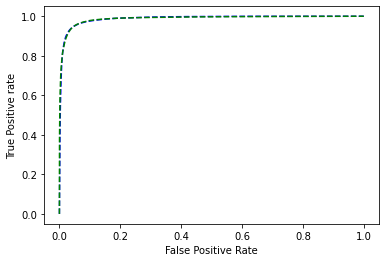

In [78]:
for i in range(n_class): 
    plt.plot(fpr[i], tpr[i], linestyle='--',color=random.choice(color)) 
 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive rate') 

# Saving the best model :

In [79]:
import pickle
filename='MicroCredit.pkl'
pickle.dump(rfc,open(filename,'wb'))

# Predictions :

In [80]:
predictions=rfc.predict(x_test)

In [81]:
predictions

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [82]:
pd.DataFrame([predictions[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,0,0
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
73368,0,0
73369,0,0
73370,1,1
73371,0,0
